In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

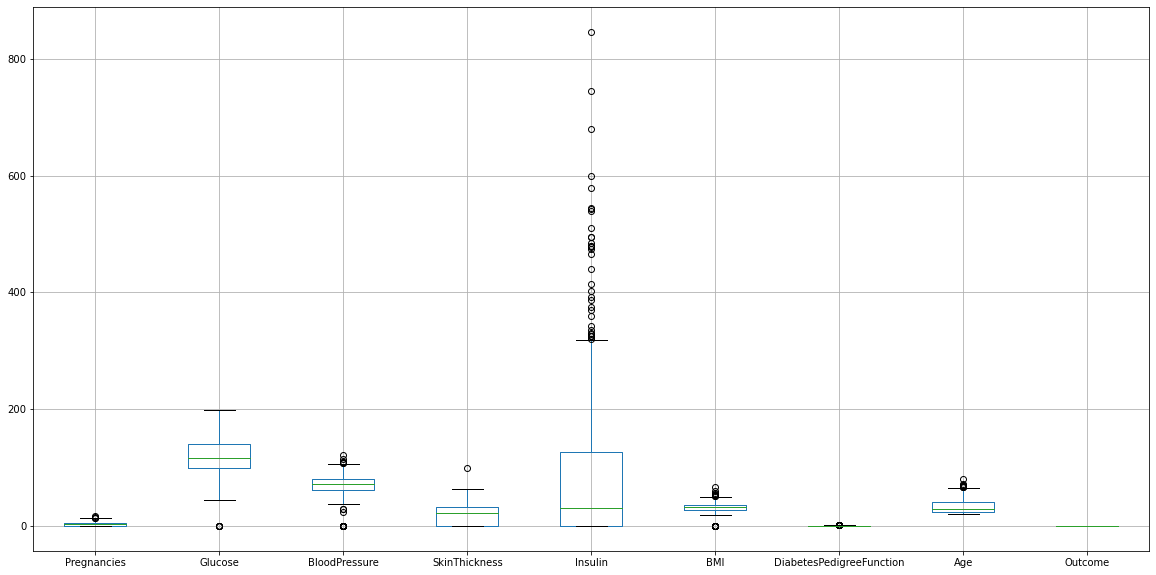

In [6]:
#Box Plot for each input variable
pd.plotting.boxplot_frame(df,figsize=(20,10))

C:\Users\aayma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

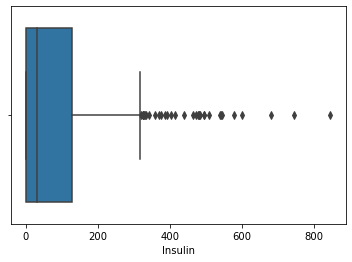

In [7]:
sns.boxplot(df['Insulin'])

In [8]:
def drop_outlayer(df,col):    
    print("Old Shape: ", df.shape) 
    Q1= np.percentile(df[col], 25,interpolation = 'midpoint')
    Q3= np.percentile(df[col], 75,interpolation = 'midpoint') 
    IQR=Q3-Q1
    # Upper bound
    upper = np.where(df[col] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df[col] <= (Q1-1.5*IQR))
    print(upper)
    print(lower)
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
    print("New Shape: ", df.shape)

drop_outlayer(df,'Insulin')
# drop_outlayer(df,'BloodPressure')

Old Shape:  (768, 9)
(array([  8,  13,  54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258,
       286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584,
       612, 645, 655, 695, 707, 710, 715, 753], dtype=int64),)
(array([], dtype=int64),)
New Shape:  (734, 9)


In [9]:
#check for missing data
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#drop duplicate data instances if any
df = df.drop_duplicates()
df.drop_duplicates().any()

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
Outcome                     True
dtype: bool

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

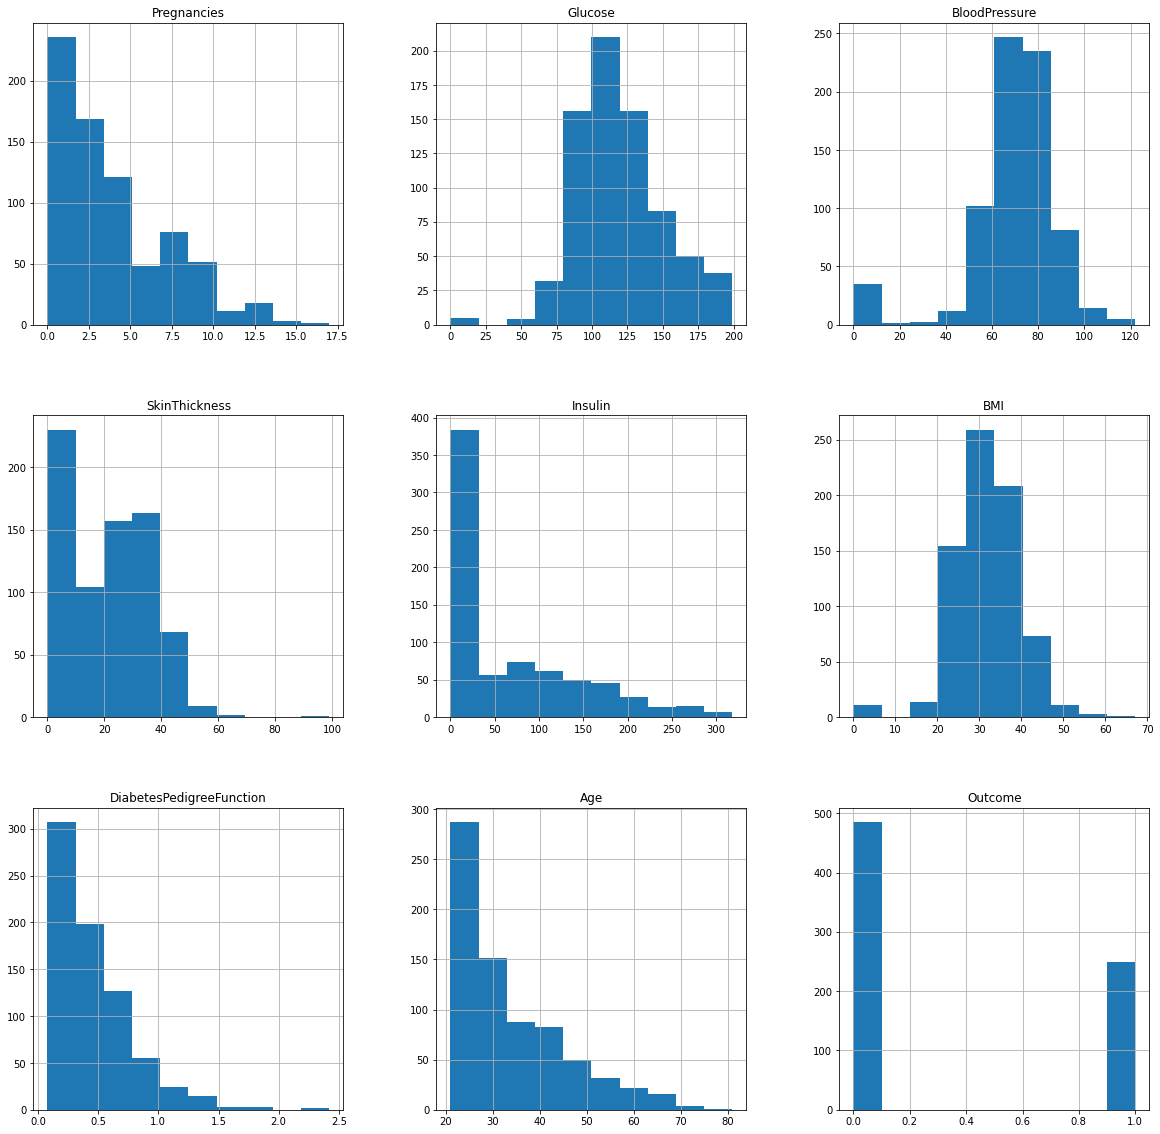

In [11]:
#Histogram Plot for each input variable

pd.plotting.hist_frame(df,figsize=(20,20))

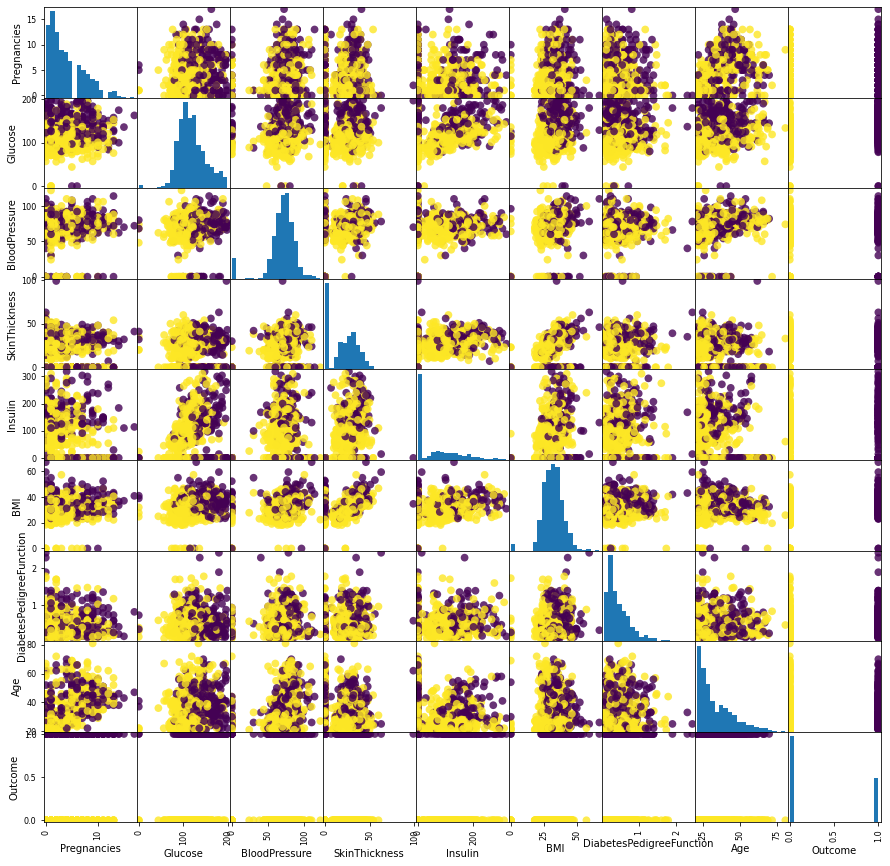

In [12]:
X=df[df.columns]
target=pd.factorize(df['Outcome'])[0]

#scatter Plot for two input variables

pd.plotting.scatter_matrix(X,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,c=target)

plt.show()

In [13]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.301031,108.791753,68.086598,19.367010,57.288660,30.168660,0.424715,31.247423
1,4.895582,139.421687,70.751004,21.188755,72.144578,35.136948,0.549120,36.959839


In [14]:
corr_with_y = df.corr()['Outcome'].drop('Outcome')
corr_with_y

Pregnancies                 0.223300
Glucose                     0.464128
BloodPressure               0.064360
SkinThickness               0.054106
Insulin                     0.088944
BMI                         0.297225
DiabetesPedigreeFunction    0.183005
Age                         0.231023
Name: Outcome, dtype: float64

In [15]:
X = df[['Pregnancies','Glucose','Insulin','BMI','Age','DiabetesPedigreeFunction','BloodPressure','SkinThickness']]
X.shape

(734, 8)

In [16]:
y = df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='liblinear')
logisticRegr.fit(x_train, y_train)
pred = logisticRegr.predict(x_test)

In [20]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.75


In [21]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, pred)

array([[107,  17],
       [ 29,  31]], dtype=int64)

# My Implementation

In [22]:
class Logistic:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.trained = False
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
        
    def predict(self, X):
        X = np.array(X)
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    

    def score(self,x,y):
        y_pred = self.predict(x)
        print("Correctly predicted labels:", (np.sum(y == y_pred)/len(y)))

In [23]:
X = df[['Pregnancies','Glucose','Insulin','BMI','Age','DiabetesPedigreeFunction','BloodPressure','SkinThickness']]
X.head()

,Pregnancies,Glucose,Insulin,BMI,Age,DiabetesPedigreeFunction,BloodPressure,SkinThickness
0,6,148,0,33.6,50,0.627,72,35
1,1,85,0,26.6,31,0.351,66,29
2,8,183,0,23.3,32,0.672,64,0
3,1,89,94,28.1,21,0.167,66,23
4,0,137,168,43.1,33,2.288,40,35


In [24]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
lin2 = Logistic(0.01,1000)
lin2.fit(x_train,y_train)
lin2.score(x_test,y_test)

Correctly predicted labels: 0.673469387755102
